In [1]:
import numpy as np
import matplotlib.pyplot as plt

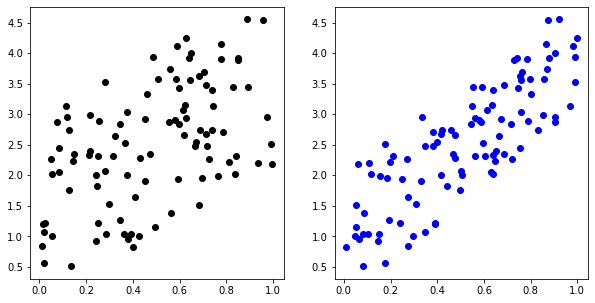

In [2]:
X = np.random.rand(100, 2)
y = (2*X[:, 0] + 3*X[:, 1] + 0.001*np.random.rand(100)).reshape(100, 1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.sca(ax[0])
plt.scatter(X[:, 0], y[:, 0], c='k')
fig.sca(ax[1])
plt.scatter(X[:, 1], y[:, 0], c='b')

In [40]:
class LinearRegression():
    '''
    '''
    def __init__(self):
        pass
    
    def predict(self, X, theta):
        X_ = np.c_[np.ones((X.shape[0], 1)), X]
        return X_ @ theta.T

    def get_cost(self, y_true, y_pred, l1=0, l2=0, theta=None):
        return 0.5 * np.average((y_true - y_pred) ** 2)

    def get_grad(self, y_true, y_pred, X_):
        return (y_true - y_pred).T @ X_

    def fit(self, X, y, iters=1000, lr=1, l1=0, l2=0, reporting_frequency=20):
        X_ = np.c_[np.ones((X.shape[0], 1)), X]
        theta = np.zeros((1, X_.shape[1]))
        
        m = X.shape[0]
        
        for i in range(iters):
            y_pred = X_ @ theta.T
            
            if iters%reporting_frequency==0:
                print(self.get_cost(y, y_pred), end="\r")
            
            reg = np.zeros(theta.shape)
            if l1:
                reg += (l1/m) * np.array(theta!=0, dtype=int)        
            if l2:
                reg += (l2/m) * theta

            
            theta += (lr/m) * self.get_grad(y, y_pred, X_) - reg
        self.coef__ = theta

In [41]:
model = LinearRegression()
model.fit(X, y)

In [43]:
model.coef__

array([[6.13872122e-04, 1.99986380e+00, 2.99997712e+00]])

In [47]:
from sklearn.linear_model import LinearRegression as LinearRegression_SK
lin_reg_sk = LinearRegression_SK()
X_ = np.c_[np.ones((X.shape[0], 1)), X]
lin_reg_sk.fit(X_, y)

LinearRegression()

In [48]:
lin_reg_sk.coef_

array([[0.        , 1.9998638 , 2.99997712]])

In [49]:
beta = np.linalg.inv(X_.T @ X_) @ X_.T @ y
beta

array([[6.13872122e-04],
       [1.99986380e+00],
       [2.99997712e+00]])